# Project Python Foundations: FoodHub Data Analysis

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost_of_the_order: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [1]:
# Installing the libraries with the specified version.
!pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 -q --user

ERROR: Ignored the following versions that require a different python version: 1.25.0 Requires-Python >=3.9; 1.25.1 Requires-Python >=3.9; 1.25.2 Requires-Python >=3.9; 1.26.0 Requires-Python <3.13,>=3.9; 1.26.1 Requires-Python <3.13,>=3.9; 1.26.2 Requires-Python >=3.9; 1.26.3 Requires-Python >=3.9; 1.26.4 Requires-Python >=3.9; 2.0.0 Requires-Python >=3.9; 2.0.1 Requires-Python >=3.9; 2.0.2 Requires-Python >=3.9; 2.1.0 Requires-Python >=3.10; 2.1.0rc1 Requires-Python >=3.10; 2.1.1 Requires-Python >=3.10
ERROR: Could not find a version that satisfies the requirement numpy==1.25.2 (from versions: 1.3.0, 1.4.1, 1.5.0, 1.5.1, 1.6.0, 1.6.1, 1.6.2, 1.7.0, 1.7.1, 1.7.2, 1.8.0, 1.8.1, 1.8.2, 1.9.0, 1.9.1, 1.9.2, 1.9.3, 1.10.0.post2, 1.10.1, 1.10.2, 1.10.4, 1.11.0, 1.11.1, 1.11.2, 1.11.3, 1.12.0, 1.12.1, 1.13.0, 1.13.1, 1.13.3, 1.14.0, 1.14.1, 1.14.2, 1.14.3, 1.14.4, 1.14.5, 1.14.6, 1.15.0, 1.15.1, 1.15.2, 1.15.3, 1.15.4, 1.16.0, 1.16.1, 1.16.2, 1.16.3, 1.16.4, 1.16.5, 1.16.6, 1.17.0, 1.17.1, 

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [1]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [2]:
# uncomment and run the following lines for Google Colab
 from google.colab import drive
 drive.mount('/content/drive')

In [3]:
# Write your code here to read the data
data = pd.read_csv('foodhub_order.csv')
# copying data to another variable to avoid any changes to original data
df = data.copy()

In [4]:
# Write your code here to view the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:
The DataFrame has 9 columns which can be seen from Data Dictionary. Each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [5]:
# Write your code here
df.shape

(1898, 9)

#### Observations:
Data has 1898 rows and 9 columns.

# Observations:1898 rows and 9 columns


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [6]:
# Write your code here
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:
The datatypes are float64= floating point (number that has decimal component), int64= Integer (whole number without a fractional component), and Object= (a string or character data type).

### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [7]:
# Write your code here
data.isnull().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

#### Observations: No null or missing data


### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [8]:
# Write your code here
df.describe().T

,count,mean,std,min,25%,50%,75%,max
order_id,1898.0,1.477496e+06,548.049724,1476547.00,1477021.25,1477495.50,1.477970e+06,1478444.00
customer_id,1898.0,1.711685e+05,113698.139743,1311.00,77787.75,128600.00,2.705250e+05,405334.00
cost_of_the_order,1898.0,1.649885e+01,7.483812,4.47,12.08,14.14,2.229750e+01,35.41
food_preparation_time,1898.0,2.737197e+01,4.632481,20.00,23.00,27.00,3.100000e+01,35.00
delivery_time,1898.0,2.416175e+01,4.972637,15.00,20.00,25.00,2.800000e+01,33.00


#### Observations:
The minimum time it takes for food to prepared once an order is placed is 20 minutes. The Average time is 27 minutes. The Maximum time is 35 minutes.
The average delivery time is 24.16 minutes. Average cost of the order is 16.49 dollars. 

### **Question 5:** How many orders are not rated? [1 mark]

In [9]:
# Write the code here
df['rating'].value_counts()

Not given    736
5            588
4            386
3            188
Name: rating, dtype: int64

#### Observations:
The number of orders which are not rated are 736. 

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

In [10]:
# Write the code here
# check unique order ID
df['order_id'].nunique()

1898

In [11]:
# check unique customer ID
df['customer_id'].nunique()

1200

#### Observations:
There are 1898 unique orders IDs and 1200 unique customers IDs. It appears that some customers have placed more than one order. 

In [12]:
# check unique Restaurant Name
df['restaurant_name'].nunique()

178

#### Observations:
There are 178 different restaurants. 

In [13]:
# Check unique cuisine type
df['cuisine_type'].nunique()

14

#### Observations:
There are 14 different cuisines. 

<AxesSubplot:xlabel='cuisine_type', ylabel='count'>

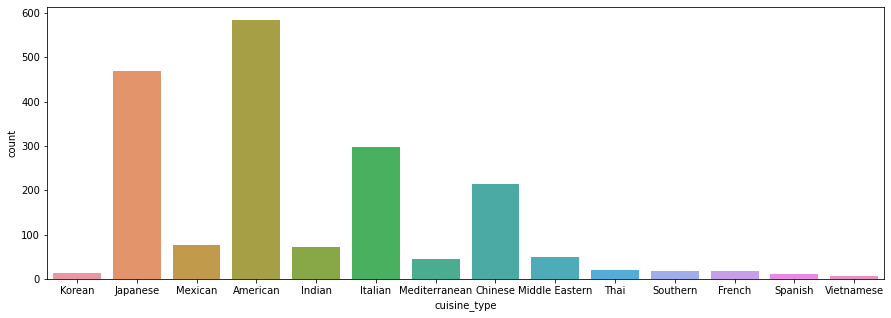

In [14]:
plt.figure(figsize = (15,5))
sns.countplot(data = df, x = 'cuisine_type') ## Create a countplot for cuisine type.

#### Observations:
American, Japanese, Italian and Chinese are most popular cuisines. 

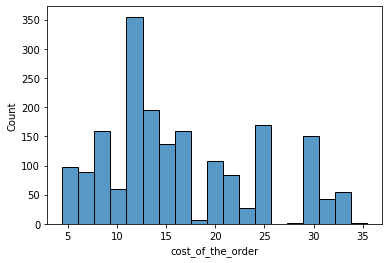

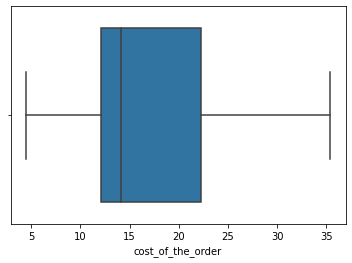

In [15]:
sns.histplot(data=df,x='cost_of_the_order') ## Histogram for the cost of order
plt.show()
sns.boxplot(data=df,x='cost_of_the_order') ## Boxplot for the cost of order
plt.show()

#### Observations:
Most of the orders cost around 14 dollars. 

<AxesSubplot:xlabel='day_of_the_week', ylabel='count'>

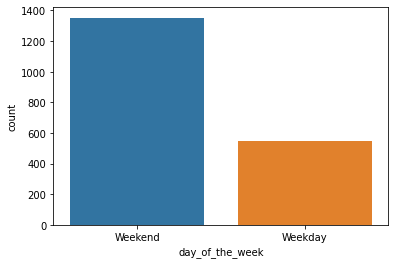

In [16]:
sns.countplot(data = df, x = 'day_of_the_week')

#### Observations:
There is more demand on weekend as compared to weekdays.

<AxesSubplot:xlabel='rating', ylabel='count'>

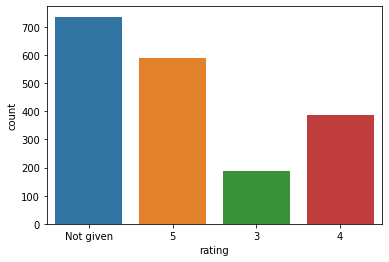

In [17]:
sns.countplot(data = df, x = 'rating')

#### Observations:
Rating for around 700 orders is not given. Many orders (around 600) are given 5 rating. 

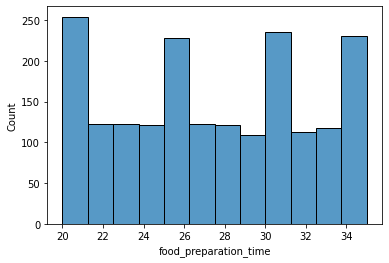

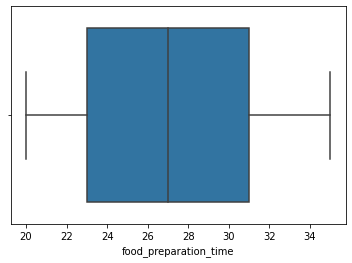

In [18]:
sns.histplot(data=df,x='food_preparation_time') ## Complete the code to plot the histogram for the cost of order
plt.show()
sns.boxplot(data=df,x='food_preparation_time') ## Complete the code to plot the boxplot for the cost of order
plt.show()

#### Observations:
Food preparation time varies from 20 to 34 minutes  

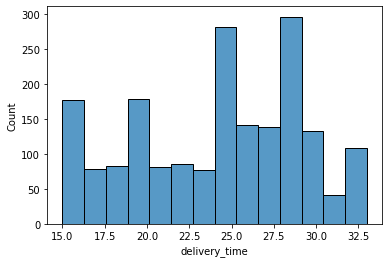

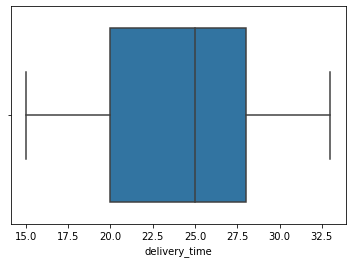

In [19]:
sns.histplot(data=df,x='delivery_time') ## Complete the code to plot the histogram for the delivery time
plt.show()
sns.boxplot(data=df,x='delivery_time') ## Complete the code to plot the boxplot for the delivery time
plt.show()

Delivery time varies from 15 minutes to 32.5 minutes. 

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [20]:
# Write the code here
df.groupby('restaurant_name')['order_id'].count().sort_values(ascending=False).head(5)

restaurant_name
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: order_id, dtype: int64

#### Observations: 
Shake shack, The Meatball Shop, Blue Ribbon Sushi, Blue Ribbon Fried Chicken, Parm are top 5 restaurants in the number of orders received. 

### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [21]:
# Write the code here
df[df['day_of_the_week'] == 'Weekend'].groupby('cuisine_type')['order_id'].count().sort_values(ascending=False).idxmax()

'American'

#### Observations: 
American is most popular cuisine on weekends

### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [22]:
# Write the code here
(df[df['cost_of_the_order']>20].shape[0]/df.shape[0])*100

29.24130663856691

#### Observations:
29 percent of orders cost more than 20 dollars

### **Question 10**: What is the mean order delivery time? [1 mark]

In [23]:
# Write the code here
df['delivery_time'].mean()

24.161749209694417

#### Observations:
Mean order delivery time is 24.16 minutes

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [24]:
# Write the code here
df.groupby('customer_id')['order_id'].count().sort_values(ascending=False).head(3)

customer_id
52832    13
47440    10
83287     9
Name: order_id, dtype: int64

#### Observations:
These are the 3 most frequent customers:
customer_id: 52832 has placed 13 orders;
customer_id: 47440 has placed 10 orders;
customer_id: 83287 has placed 9 orders.

### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


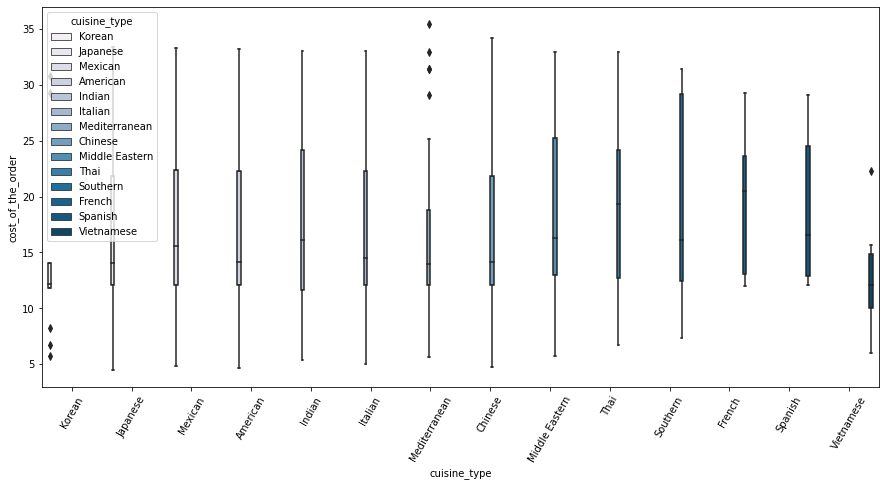

In [25]:
# Write the code here
# Relationship between cost of the order and cuisine type
plt.figure(figsize=(15,7))
sns.boxplot(x = "cuisine_type", y = "cost_of_the_order", data = df, palette = 'PuBu', hue = "cuisine_type")
plt.xticks(rotation = 60)
plt.show()

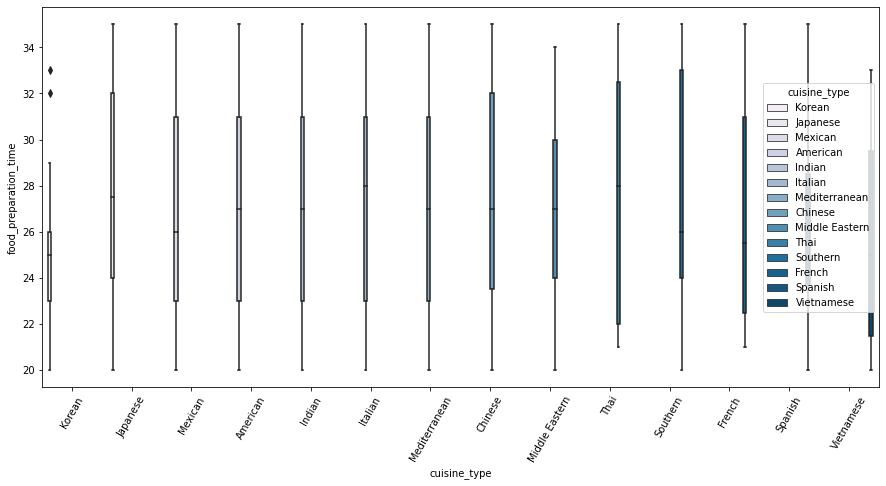

In [26]:
# Relationship between food preparation time and cuisine type
plt.figure(figsize=(15,7))
sns.boxplot(x = "cuisine_type", y = "food_preparation_time", data = df, palette = 'PuBu', hue = "cuisine_type")
plt.xticks(rotation = 60)
plt.show()

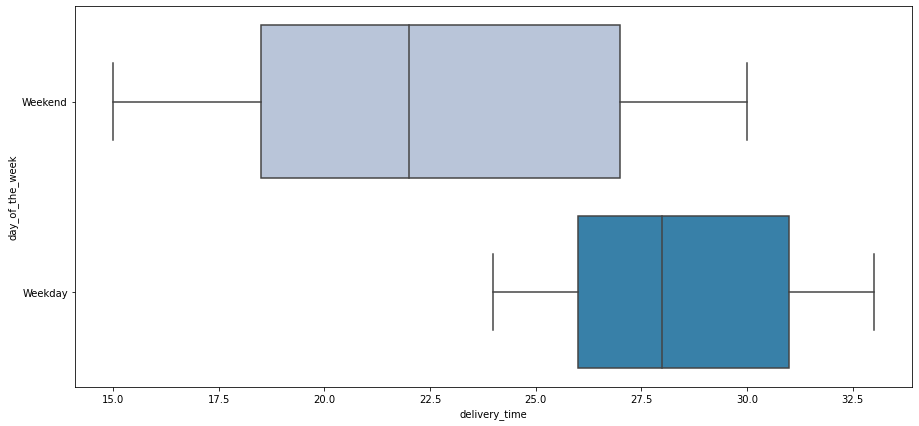

In [27]:
# Relationship between day of the week and delivery time
plt.figure(figsize=(15,7))
sns.boxplot(x = "delivery_time", y = "day_of_the_week", data = df, palette = 'PuBu') 
plt.show()

#### Observations:
Delivery time is less on the weekend. 

In [28]:
#the revenue generated by the restaurants
df.groupby(['restaurant_name'])['cost_of_the_order'].sum().sort_values(ascending = False).head(5)

restaurant_name
Shake Shack                  3579.53
The Meatball Shop            2145.21
Blue Ribbon Sushi            1903.95
Blue Ribbon Fried Chicken    1662.29
Parm                         1112.76
Name: cost_of_the_order, dtype: float64

##### Observations:
Revenue generated by these five restaurents is the highest: Shake Shack, The Meatball Shop, Blue Ribbon Sushi, Blue Ribbon Fried Chicken and Parm. 

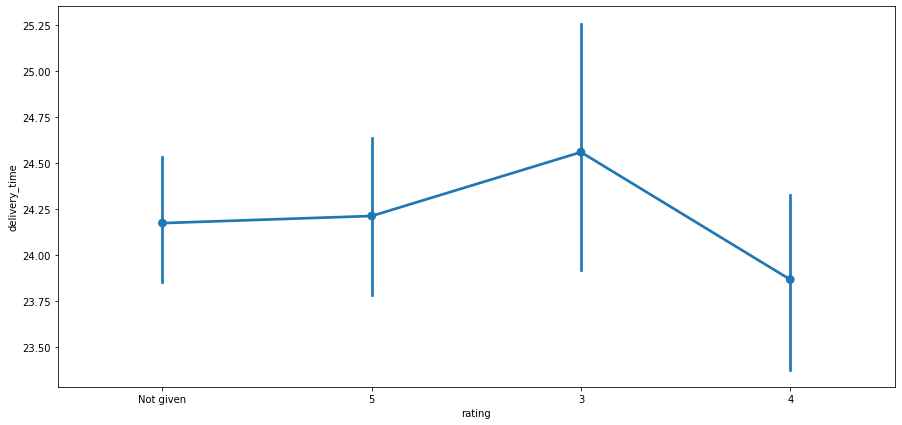

In [29]:
# Relationship between rating and delivery time
plt.figure(figsize=(15, 7))
sns.pointplot(x = 'rating', y = 'delivery_time', data = df)
plt.show()

#### Observations:
Rating is generally more when the delivery_time is less. 

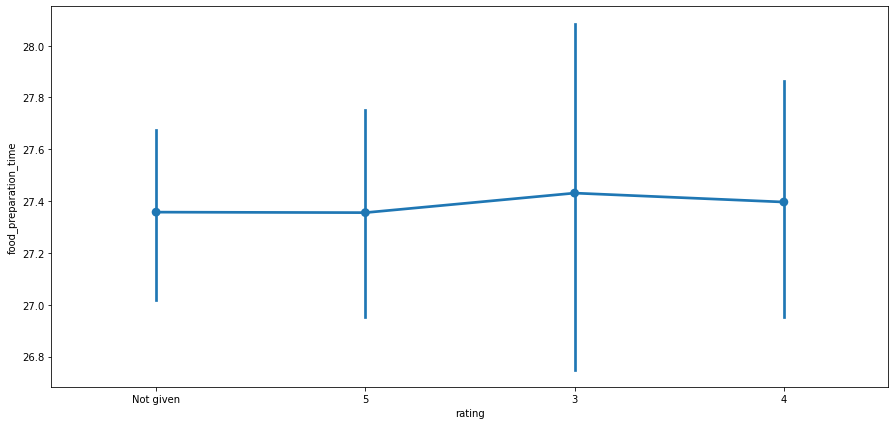

In [30]:
# Relationship between rating and food preparation time
plt.figure(figsize=(15, 7))
sns.pointplot(x = 'rating', y = 'food_preparation_time', data = df) 
plt.show()

##### Observations:
Rating does not have much correlation with food_preparation_time.  

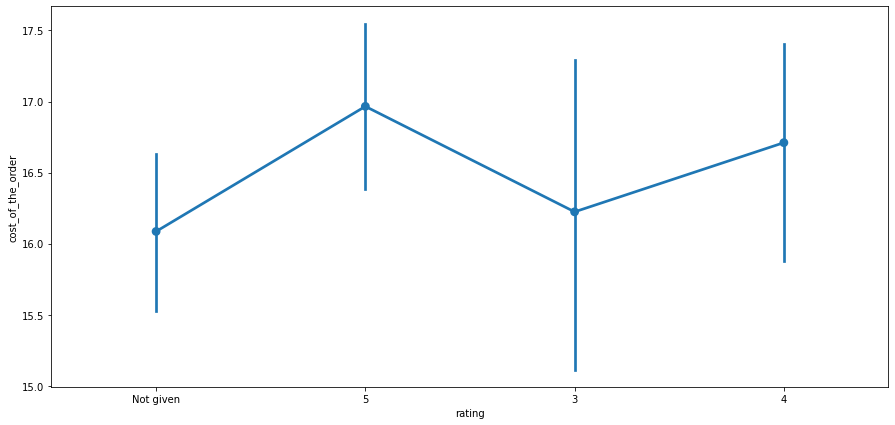

In [31]:
# Relationship between rating and cost of the order
plt.figure(figsize=(15, 7))
sns.pointplot(x ='rating', y='cost_of_the_order', data=df)
plt.show()

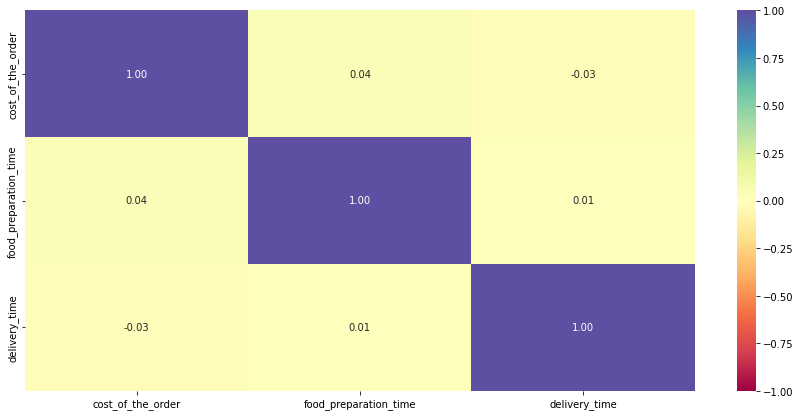

In [32]:
# Plot the heatmap
col_list = ['cost_of_the_order', 'food_preparation_time', 'delivery_time']
plt.figure(figsize=(15, 7))
sns.heatmap(df[col_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

### Observations:
There is not much correlation between delivery time, food preparation time and cost of the order. 

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [33]:
# Write the code here
# Step 1: Filter the restaurants where rating is not 'Not given'
df_rated = df[df['rating'] != 'Not given'].copy()

# Step 2: Convert the 'rating' column from object to integer
df_rated['rating'] = df_rated['rating'].astype(int)
df_rated.head()

# Step 3: Create a DataFrame with restaurant names and their rating counts
df_rating_count = df_rated.groupby('restaurant_name')['rating'].count()
# Convert Series to DataFrame
df_rating_count = df_rating_count.reset_index()
df_rating_count.columns = ['restaurant_name', 'count']  # Rename columns appropriately
df_rating_count.head()

# Step 4: Get all the restaurant names that have a rating count of more than 50
df_restaurant_names = df_rating_count[df_rating_count['count']>50]

#Step 5: ﬁnd the mean rating of the restaurants by using the group by function
df_mean_ratings = df_rated.groupby('restaurant_name')['rating'].mean()
df_high_rated = df_mean_ratings[df_mean_ratings>4]

#Step 6:restaurants having rating count of more than 50 and the average rating greater than 4
df_restaurant_names[df_restaurant_names['restaurant_name'].isin(df_high_rated.index)]

,restaurant_name,count
16,Blue Ribbon Fried Chicken,64
17,Blue Ribbon Sushi,73
117,Shake Shack,133
132,The Meatball Shop,84


#### Observations:
The restaurants fulfilling the criteria to get the promotional offer are Blue Ribbon Fried Chicken, Blue Ribbon Sushi, Shake Shack and The Meatball Shop. 


### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [34]:
# Write the code here
def compute_rev(x):
    if x > 20:
        return x*0.25
    elif x > 5:
        return x*0.15
    else:
        return x*0

df['Revenue'] = df['cost_of_the_order'].apply(compute_rev) ##to compute the revenue
print('Net revenue is',df['Revenue'].sum(),'dollars')

Net revenue is 6166.303 dollars


#### Observations: 
The net revenue generated by the company across all orders is 6166.303 dollars. 

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [35]:
# Write the code here
df[df['food_preparation_time']+df['delivery_time']>60]['order_id'].shape[0]/df.shape[0]*100

10.537407797681771

#### Observations:
Around 10.54 percent of orders take more than 60 minutes to get delivered from the time the order is placed.

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [36]:
# Write the code here
# The mean delivery time on weekdays
print('The mean delivery time on weekdays is around',
      round(df[df['day_of_the_week'] == 'Weekday']['delivery_time'].mean()),
     'minutes')


## The mean delivery time on weekends 
print('The mean delivery time on weekends is around', 
      round(df[df['day_of_the_week']=="Weekend"]['delivery_time'].mean()),'minutes')

The mean delivery time on weekdays is around 28 minutes
The mean delivery time on weekends is around 22 minutes


#### Observations:
Mean delivery time on weekdays is more than the mean delivery time on weekends.

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
*  Delivery time on weekend is less than on weekdays.
*  The average delivery time is less than 30 minutes but some orders (around 10%) take more than 60 minutes. 
*  The restaurents with higher rating and rating count are very popular suggesting the customer satisfaction and repeated customers. These restuarents also generate more revenue.
* There are many variety of cuisines and many people like American, Japanese, Italian and Chinese, suggesting different food preferences.

### Recommendations:

*  Increase American and Japanese Cuisine Options.
*  Encourage customers to provide ratings by providing some scheme so as to understand the ways to improve.
*  Give rewards to high rated restauarants and promote them by advertising them.
*  Some orders (around 10%) take more than 60 minutes for the order to get delivered from the time it is placed, the company should investigate this and try to reduce this percentage. 
* Company should try to underrstand why delivery time is less on weekend and try to replicate that on weekdays as well. 
* Customers placing more orders should be provided some discount or some loyalty program should be considered to retain the repeated customers so as to get more orders. 